In [ ]:
!pip install xgboost
!pip install catboost
!pip install lightgbm
import xgboost as xgb
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score as RSquared
from sklearn.ensemble import  RandomForestRegressor
from catboost import CatBoostRegressor, Pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def MSE(target, pred):
  N = len(target)
  return np.sum((target-pred)**2)/N

def RRMSE(target, pred):
    num = np.sum((target - pred) ** 2)
    dem = np.sum((np.mean(target) - target) ** 2)
    if(dem == 0):
        print(target.shape)
        print(pred.shape)
        print()
    return np.sqrt(num/dem)

def RMSE(target, pred):
    return np.sqrt(MSE(target, pred))

train_data = pd.read_csv('oxides_Tg_train.csv')
test_data = pd.read_csv('oxides_Tg_test.csv')

In [ ]:
train_data.head()

Li   Be         B         O        Na        Mg        Al        Si  \
0  0.000000  0.0  0.016713  0.629526  0.000000  0.000000  0.000000  0.000000   
1  0.136364  0.0  0.318182  0.545455  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.0  0.000000  0.561469  0.127436  0.000000  0.000000  0.186657   
3  0.000000  0.0  0.030469  0.629816  0.000000  0.026315  0.062413  0.210063   
4  0.000000  0.0  0.243386  0.584362  0.000000  0.000000  0.000000  0.000000   

          P    K  ...   Hf   Ta    W   Hg   Tl        Pb   Bi   Th    U  \
0  0.167131  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
1  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
2  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.148736  0.0  0.0  0.0   

       Tg  
0  599.15  
1  770.15  
2  846.15  
3  997.15  
4  693.15  

[5 rows x 66 columns]

In [ ]:
#XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=3500,
    eta=0.1,
    max_depth=4,
    objective='reg:squarederror'
    )
xgbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = xgbr.predict(test_data.iloc[:, :-1])
xgb_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))


print(f"R2Score XGBoost: {xgb_rmse}")
print(f'RMSE XGBoost: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE XGBoost: {RRMSE(test_data.iloc[:, -1], y_pred)}')


R2Score XGBoost: 0.9771521368842377
RMSE XGBoost: 32.451752890955404
RRMSE XGBoost: 0.2125410581101166


In [ ]:
#CatBoost
cbr = CatBoostRegressor(iterations=2000, learning_rate=0.2,
                            max_depth=7, loss_function='RMSE')


cbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = cbr.predict(test_data.iloc[:, :-1])

cat_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score CATBoost: {cat_rmse}")
print(f'RMSE CATBoost: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE CATBoost: {RRMSE(test_data.iloc[:, -1], y_pred)}')


0:	learn: 134.4055193	total: 90.7ms	remaining: 3m 1s
1:	learn: 121.0658731	total: 125ms	remaining: 2m 5s
2:	learn: 111.2740674	total: 161ms	remaining: 1m 46s
3:	learn: 103.0217359	total: 208ms	remaining: 1m 43s
4:	learn: 96.7353072	total: 243ms	remaining: 1m 36s
5:	learn: 91.8673940	total: 276ms	remaining: 1m 31s
6:	learn: 88.1731341	total: 314ms	remaining: 1m 29s
7:	learn: 84.2465838	total: 348ms	remaining: 1m 26s
8:	learn: 81.7356213	total: 379ms	remaining: 1m 23s
9:	learn: 78.9212699	total: 410ms	remaining: 1m 21s
10:	learn: 76.4549865	total: 443ms	remaining: 1m 20s
11:	learn: 74.5190504	total: 475ms	remaining: 1m 18s
12:	learn: 72.6768124	total: 505ms	remaining: 1m 17s
13:	learn: 70.9826225	total: 545ms	remaining: 1m 17s
14:	learn: 69.5733282	total: 578ms	remaining: 1m 16s
15:	learn: 68.4219794	total: 610ms	remaining: 1m 15s
16:	learn: 67.3532162	total: 645ms	remaining: 1m 15s
17:	learn: 66.1572344	total: 683ms	remaining: 1m 15s
18:	learn: 65.2861568	total: 714ms	remaining: 1m 14s


In [ ]:
#RF Regressor (differently tuned from author)
rfr = RandomForestRegressor(n_estimators=300)

rfr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = rfr.predict(test_data.iloc[:, :-1])

rf_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score RFR: {rf_rmse}")
print(f'RMSE RFR: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE RFR: {RRMSE(test_data.iloc[:, -1], y_pred)}')

R2Score RFR: 0.9781268381330126
RMSE RFR: 31.75983028630166
RRMSE RFR: 0.20800934720323358


In [ ]:
#LGBM Regressor (best in this case!)
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.09
)
lgbm_reg.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = lgbm_reg.predict(test_data.iloc[:, :-1])
lgbm_rsquared =  np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R squared for LightGBM: {lgbm_rsquared}")
print(f'RMSE LGBM: {RMSE(test_data.iloc[:, -1], y_pred)}')
print(f'RRMSE LGBM: {RRMSE(test_data.iloc[:, -1], y_pred)}')


R squared for LightGBM: 0.9808609988534727
RMSE LGBM: 29.72911334790111
RRMSE LGBM: 0.19470927283559952


In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.6 MB/s eta 0:00:00


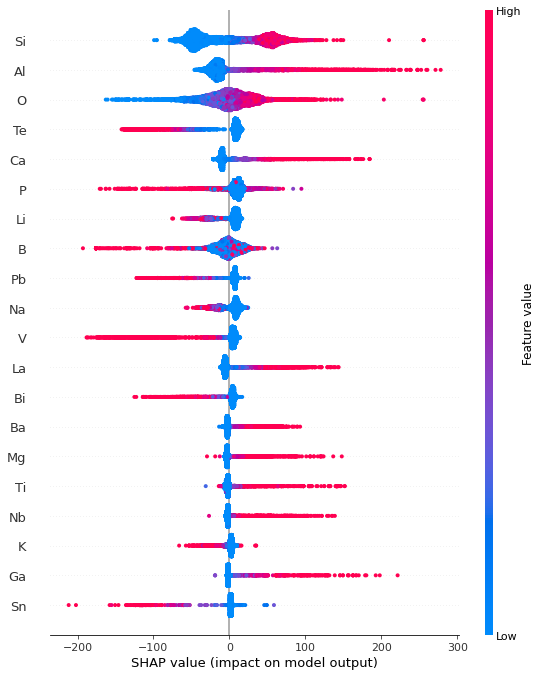

In [ ]:
shap_values = cbr.get_feature_importance(Pool(test_data.iloc[:,:-1],label = test_data.iloc[:,-1] ), type = "ShapValues")

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.summary_plot(shap_values,test_data.iloc[:,:-1])